<a href="https://colab.research.google.com/github/ZScyan/CobraLab/blob/main/biomat/LotkaVolterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

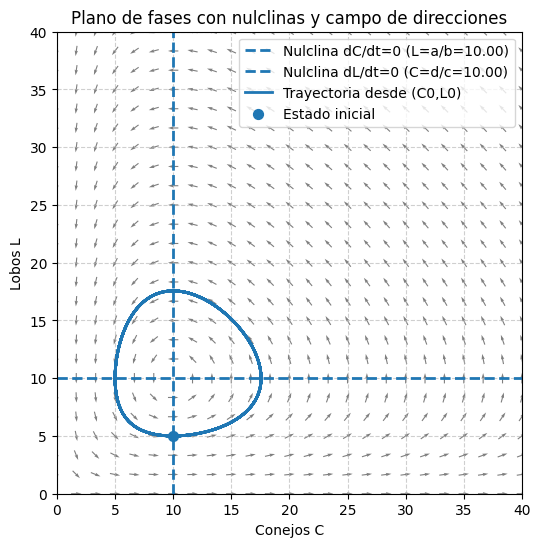

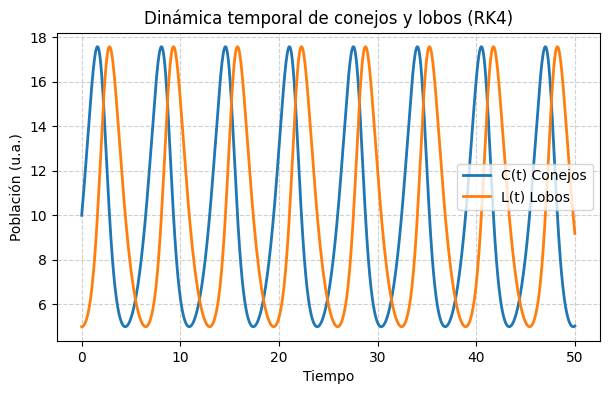

Parámetros: a=1.0, b=0.1, c=0.1, d=1.0
Punto de equilibrio no trivial: C* = d/c = 10.000, L* = a/b = 10.000


In [4]:
# Lotka–Volterra con nulclinas, campo de direcciones y dinámica temporal
# dC/dt = a*C - b*C*L
# dL/dt = c*C*L - d*L

import numpy as np
import matplotlib.pyplot as plt

# ===== Parámetros (edítalos) =====
a = 1.0      # crecimiento de conejos
b = 0.1      # depredación por encuentro
c = 0.1      # eficiencia conversión presa->depredador
d = 1.0      # muerte natural de lobos

C0, L0 = 10.0, 5.0   # condiciones iniciales
t_final = 50.0
dt = 0.01

# Rango del plano de fases para visualizar
C_min, C_max = 0.0, 40.0
L_min, L_max = 0.0, 40.0
grid_n = 25  # densidad del campo de direcciones
# =================================

def f(C, L):
    dC = a*C - b*C*L
    dL = c*C*L - d*L
    return dC, dL

# ---- RK4 para una trayectoria ----
def rk4_step(C, L, h):
    k1C, k1L = f(C, L)
    k2C, k2L = f(C + 0.5*h*k1C, L + 0.5*h*k1L)
    k3C, k3L = f(C + 0.5*h*k2C, L + 0.5*h*k2L)
    k4C, k4L = f(C + h*k3C,     L + h*k3L)
    Cn = C + (h/6.0)*(k1C + 2*k2C + 2*k3C + k4C)
    Ln = L + (h/6.0)*(k1L + 2*k2L + 2*k3L + k4L)
    # Evitar negativos por error numérico
    return max(Cn, 0.0), max(Ln, 0.0)

# ---- Simulación temporal ----
steps = int(t_final/dt)
t = np.linspace(0, t_final, steps+1)
C = np.zeros(steps+1); L = np.zeros(steps+1)
C[0], L[0] = C0, L0
for i in range(steps):
    C[i+1], L[i+1] = rk4_step(C[i], L[i], dt)

# ---- Campo de direcciones (quiver) ----
C_vals = np.linspace(C_min, C_max, grid_n)
L_vals = np.linspace(L_min, L_max, grid_n)
CC, LL = np.meshgrid(C_vals, L_vals, indexing='xy')
dC, dL = f(CC, LL)

# Normalizar flechas para mejor visualización
mag = np.hypot(dC, dL)
mag[mag == 0] = 1.0
dCn, dLn = dC/mag, dL/mag

plt.figure(figsize=(6,6))
plt.quiver(CC, LL, dCn, dLn, alpha=0.5, pivot='mid')

# ---- Nulclinas ----
L_null = a/b if b > 0 else None
C_null = d/c if c > 0 else None
if L_null is not None:
    plt.axhline(L_null, linestyle='--', linewidth=2, label=f"Nulclina dC/dt=0 (L=a/b={L_null:.2f})")
if C_null is not None:
    plt.axvline(C_null, linestyle='--', linewidth=2, label=f"Nulclina dL/dt=0 (C=d/c={C_null:.2f})")

# ---- Trayectoria en el plano de fases ----
plt.plot(C, L, linewidth=2, label="Trayectoria desde (C0,L0)")
plt.scatter([C0], [L0], s=50, zorder=3, label="Estado inicial")

plt.xlim(C_min, C_max)
plt.ylim(L_min, L_max)
plt.xlabel("Conejos C")
plt.ylabel("Lobos L")
plt.title("Plano de fases con nulclinas y campo de direcciones")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ---- Gráfica temporal añadida ----
plt.figure(figsize=(7,4))
plt.plot(t, C, label="C(t) Conejos", linewidth=2)
plt.plot(t, L, label="L(t) Lobos", linewidth=2)
plt.xlabel("Tiempo")
plt.ylabel("Población (u.a.)")
plt.title("Dinámica temporal de conejos y lobos (RK4)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Parámetros: a={a}, b={b}, c={c}, d={d}")
if (b>0) and (c>0):
    print(f"Punto de equilibrio no trivial: C* = d/c = {d/c:.3f}, L* = a/b = {a/b:.3f}")
else:
    print("Para nulclinas no triviales usa b>0 y c>0.")
